owis alhammoud

In [21]:
from rdflib import  URIRef,BNode,Literal,Namespace
from rdflib.namespace import  FOAF,DCTERMS,XSD,RDF,SDO,RDFS
from rdflib import Graph

In [22]:
EX=Namespace('http://www.example.org/')
P=Namespace('http://www.ex.or/predicate/')
EM=EX['ELONMASK']

In [23]:
g= Graph()
g.bind('ex',EX)
g.bind('p',P)

In [24]:
b0=BNode()
b1=BNode()
b2=BNode()
b3=BNode()


In [25]:
g.add((EM,P['gender'],EX['male']))
g.add((EM,P['name'],Literal('elon')))
g.add((EM,P['eduacated'],EX['QU']))
g.add((EM,P['employer'],b0))
g.add((b0,RDF.type,RDF.Bag))
g.add((b0,RDFS.member,b1))
g.add((b0,RDFS.member,b2))
g.add((EM,P['CurreentPosition'],b3))
g.add((b1,P['company'],EX['PAYPAL']))
g.add((b1,P['StartIN'],Literal('1998',datatype=XSD.int)))
g.add((b2,P['company'],EX['SpaceX']))
g.add((b2,P['StartIN'],Literal('2002',datatype=XSD.int)))
g.add((b3,P['company'],EX['Twiter']))
g.add((b3,P['StartIN'],Literal('2022',datatype=XSD.int)))
g.add((b3,P['Position'],EX['CheefEX']))
g.add((EX['Twiter'],P['TypeOF'],EX['SocialNT']))

<Graph identifier=Ne5cb98dda82740278338e633c561ff75 (<class 'rdflib.graph.Graph'>)>

In [26]:
print(g.serialize(format='ttl'))

@prefix ex: <http://www.example.org/> .
@prefix p: <http://www.ex.or/predicate/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:ELONMASK p:CurreentPosition [ p:Position ex:CheefEX ;
            p:StartIN "2022"^^xsd:int ;
            p:company ex:Twiter ] ;
    p:eduacated ex:QU ;
    p:employer [ a rdf:Bag ;
            rdfs:member [ p:StartIN "1998"^^xsd:int ;
                    p:company ex:PAYPAL ],
                [ p:StartIN "2002"^^xsd:int ;
                    p:company ex:SpaceX ] ] ;
    p:gender ex:male ;
    p:name "elon" .

ex:Twiter p:TypeOF ex:SocialNT .




In [27]:
Ns={
    'ex':EX,
    'p':P
}

In [28]:
task4_a=g.query("""
SELECT ?n
WHERE {
    ?p p:name ?n .
    ?p p:gender ex:male .
    ?p p:eduacated ex:QU .

}


""")
print(list(task4_a))

[(rdflib.term.Literal('elon'),)]


In [29]:
task4_b=g.query("""

SELECT ?s
WHERE {
    ?s p:TypeOF ex:SocialNT .
}

""",initNs=Ns)
print(list(task4_b))


[(rdflib.term.URIRef('http://www.example.org/Twiter'),)]


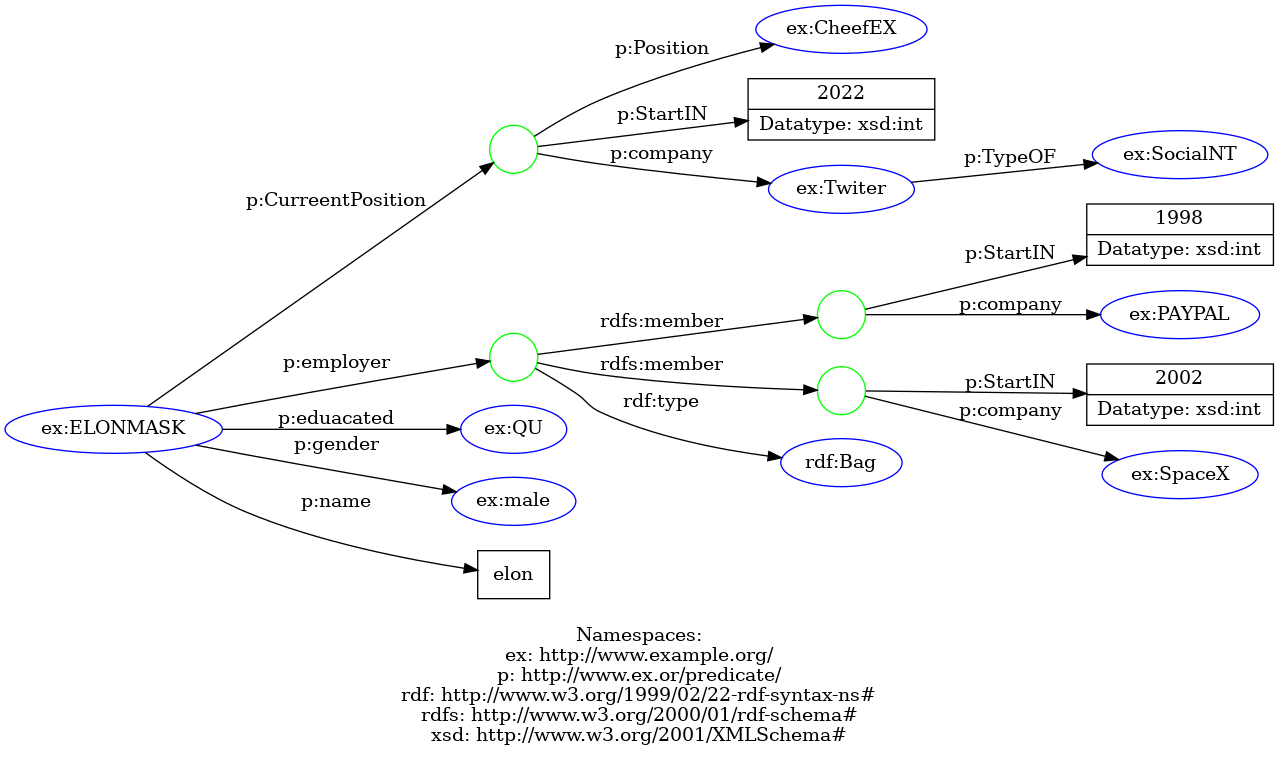

In [30]:
import requests
from IPython.display import Image
params = {
    'rdf': g.serialize(format='ttl'),
    'from': 'ttl',
    'to':'png'
    }
response = requests.get('http://www.ldf.fi/service/rdf-grapher',params=params)
img = Image(response.content)
display(img)